In [2]:
import pandas as pd
# abrimos el archivo usando una función específica de pandas
raw_dataset = pd.read_csv("winequality_BE.csv", delimiter = ';')

In [ ]:
raw_dataset.info()

In [ ]:
raw_dataset["alcohol"].value_counts()

Alcohol tiene valores no válidos

Densidad tiene valores no válidos, HOLA

In [ ]:
raw_dataset.describe()

In [3]:
dataset_modificado = raw_dataset.copy()

LIMPIEZA DE DATOS

In [4]:

dataset_modificado['alcohol'] = dataset_modificado['alcohol'].apply(lambda x: x.replace('.', ',', 1))
dataset_modificado['alcohol'] = dataset_modificado['alcohol'].str.replace('.', '')
dataset_modificado['alcohol'] = dataset_modificado['alcohol'].str.replace(',', '.')
dataset_modificado['alcohol'] = dataset_modificado['alcohol'].astype(float)

# convierte alchol a de object a float

In [5]:
dataset_modificado["alcohol"].value_counts().sort_index(ascending=False)

alcohol
956.666667     1
923.333333     1
135.666667     1
110.666667     1
100.333333     2
              ..
8.700000      25
8.600000       7
8.500000       2
8.400000       2
8.000000       2
Name: count, Length: 69, dtype: int64

Çambiamos los valores fuera de rango, ya que evaluamos que pueden ser valores reales ingresados de forma incorrecta:
956.666667     = 9,56
923.333333     = 9,23
135.666667     = 13,56
110.666667     = 11,6
100.333333     = 10,3

In [6]:
dataset_modificado["alcohol"] = dataset_modificado["alcohol"].astype("double")

In [7]:
conteo = dataset_modificado[dataset_modificado['density'] > 1]['density'].count()

print(conteo)

113


In [8]:
import numpy as np

# Usar numpy.isclose para comparar con tolerancia
dataset_modificado.loc[np.isclose(dataset_modificado['alcohol'], 956.666667), 'alcohol'] = 9.56
dataset_modificado.loc[np.isclose(dataset_modificado['alcohol'], 923.333333), 'alcohol'] = 9.23
dataset_modificado.loc[np.isclose(dataset_modificado['alcohol'], 135.666667), 'alcohol'] = 13.56
dataset_modificado.loc[np.isclose(dataset_modificado['alcohol'], 110.666667), 'alcohol'] = 11.6
dataset_modificado.loc[np.isclose(dataset_modificado['alcohol'], 100.333333), 'alcohol'] = 10.3

dataset_modificado["alcohol"].value_counts().sort_index(ascending=False)

alcohol
14.90     1
14.00     9
13.70     2
13.60     4
13.56     1
         ..
8.70     25
8.60      7
8.50      2
8.40      2
8.00      2
Name: count, Length: 67, dtype: int64

ELIMINAMOS REPETIDOS


In [9]:
# imprimimos las filas duplicadas
dataset_modificado[dataset_modificado.duplicated(keep=False)]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3,Viogner,7.8,0.490,0.49,7.00,0.043,29.0,149.0,0.99520,3.21,0.33,10.0,5
7,Viogner,7.8,0.490,0.49,7.00,0.043,29.0,149.0,0.99520,3.21,0.33,10.0,5
8,Viogner,6.4,0.220,0.49,7.50,0.054,42.0,151.0,0.99480,3.27,0.52,10.1,6
9,Viogner,7.3,0.190,0.49,15.55,0.058,50.0,134.0,0.99980,3.42,0.36,9.1,7
11,Viogner,7.3,0.190,0.49,15.55,0.058,50.0,134.0,0.99980,3.42,0.36,9.1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3200,Merlot,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
3212,Merlot,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
3214,Merlot,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
3225,Merlot,6.3,0.510,0.13,2.30,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6


In [10]:
# eliminamos los duplicados
dataset_modificado.drop_duplicates(keep="first", inplace=True)
# contamos la cantidad de duplicados
dataset_modificado.duplicated().sum()

0

In [11]:
dataset_modificado["density"].value_counts().sort_index(ascending=False)

density
103.89800    1
100.36900    1
100.31500    2
100.28900    1
100.24200    1
            ..
0.98870      1
0.98865      1
0.98836      1
0.98802      1
0.98713      1
Name: count, Length: 772, dtype: int64

In [12]:
condicion = dataset_modificado['density'] <= 1 # LOS VALORES CON LOS QUE TE QUERES QUEDAR  
df_filtrado = dataset_modificado[condicion]
df_filtrado["density"].value_counts().sort_index(ascending=False)

density
1.00000    15
0.99990     2
0.99980    12
0.99976     4
0.99975     1
           ..
0.98870     1
0.98865     1
0.98836     1
0.98802     1
0.98713     1
Name: count, Length: 734, dtype: int64

In [13]:
#Paso las columas de dioxido de sulfuro total y libre a gramos por litro para que quede en la misma escala que las demas variables. Tambien la de densidad de gramos por centimetro cubico a gramos por litro
"""
dataset_modificado['total sulfur dioxide'] = dataset_modificado['total sulfur dioxide'] / 1000
dataset_modificado['free sulfur dioxide'] = dataset_modificado['free sulfur dioxide'] / 1000
dataset_modificado['density'] = dataset_modificado['density'] * 1000
dataset_modificado
"""

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,Viogner,7.4,0.190,0.49,6.7,0.037,0.015,0.110,993.80,3.20,0.38,11.0,7
1,Viogner,8.3,0.250,0.49,16.8,0.048,0.050,0.228,10001.00,3.03,0.52,9.2,6
2,Viogner,7.5,0.140,0.74,1.6,0.035,0.021,0.126,993.30,3.26,0.45,10.2,6
3,Viogner,7.8,0.490,0.49,7.0,0.043,0.029,0.149,995.20,3.21,0.33,10.0,5
4,Viogner,8.1,0.120,0.49,1.2,0.042,0.043,0.160,993.40,3.13,0.48,9.7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3226,Merlot,6.8,0.620,0.08,1.9,0.068,0.028,0.038,996.51,3.42,0.82,9.5,6
3227,Merlot,6.2,0.600,0.08,2.0,0.090,0.032,0.044,994.90,3.45,0.58,10.5,5
3228,Merlot,5.9,0.550,0.10,2.2,0.062,0.039,0.051,995.12,3.52,0.76,11.2,6
3230,Merlot,5.9,0.645,0.12,2.0,0.075,0.032,0.044,995.47,3.57,0.71,10.2,5


In [27]:
import webbrowser
import pandas_profiling as pp
from pathlib import Path

nombre_archivo = "vinos"

# Generamos el reporte
report = pp.ProfileReport(dataset_modificado)

# Lo mostramos interactivo en nuestra notebook
if not Path(f"{nombre_archivo}.html").exists():
    report.to_file(output_file=(f"{nombre_archivo}.html"))
else:
    print("ya está creado, relaja que ahí te lo abro")

# Abrir el archivo HTML
webbrowser.open(f'{nombre_archivo}.html')



ya está creado, relaja que ahí te lo abro


True

In [ ]:

df_filtrado.info()

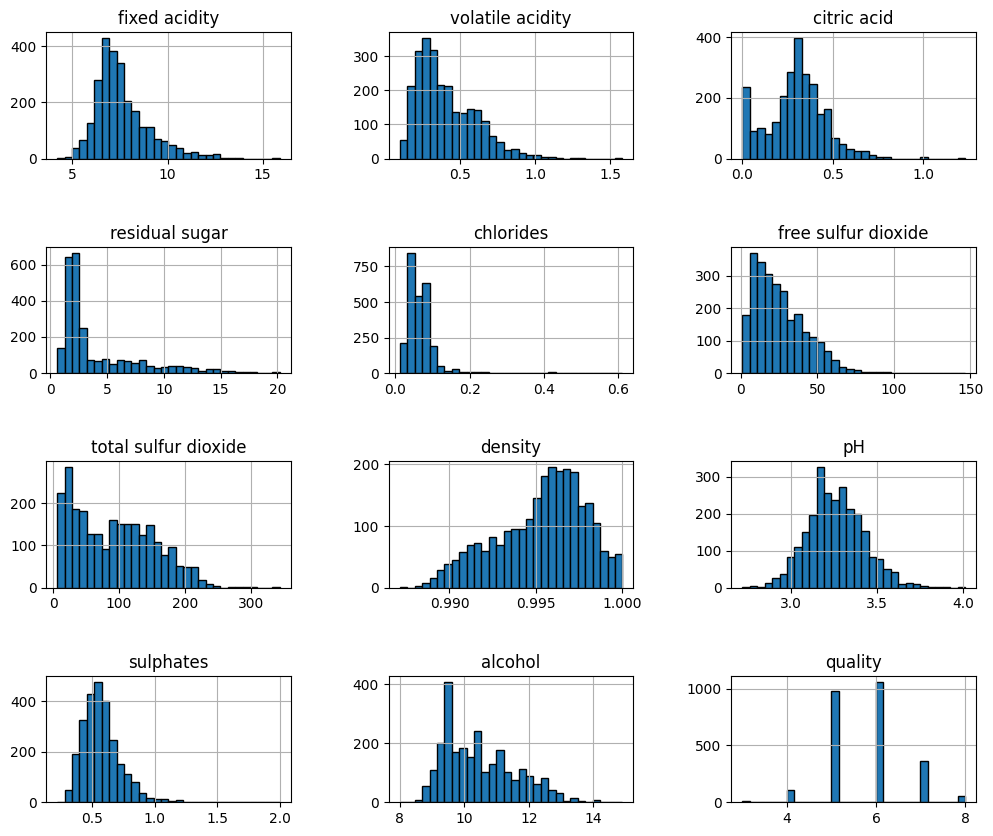

In [15]:
%matplotlib inline
import matplotlib

import matplotlib.pyplot as plt
# construimos una serie de histogramas mostrando la distribución de las features
df_filtrado.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)
plt.show()

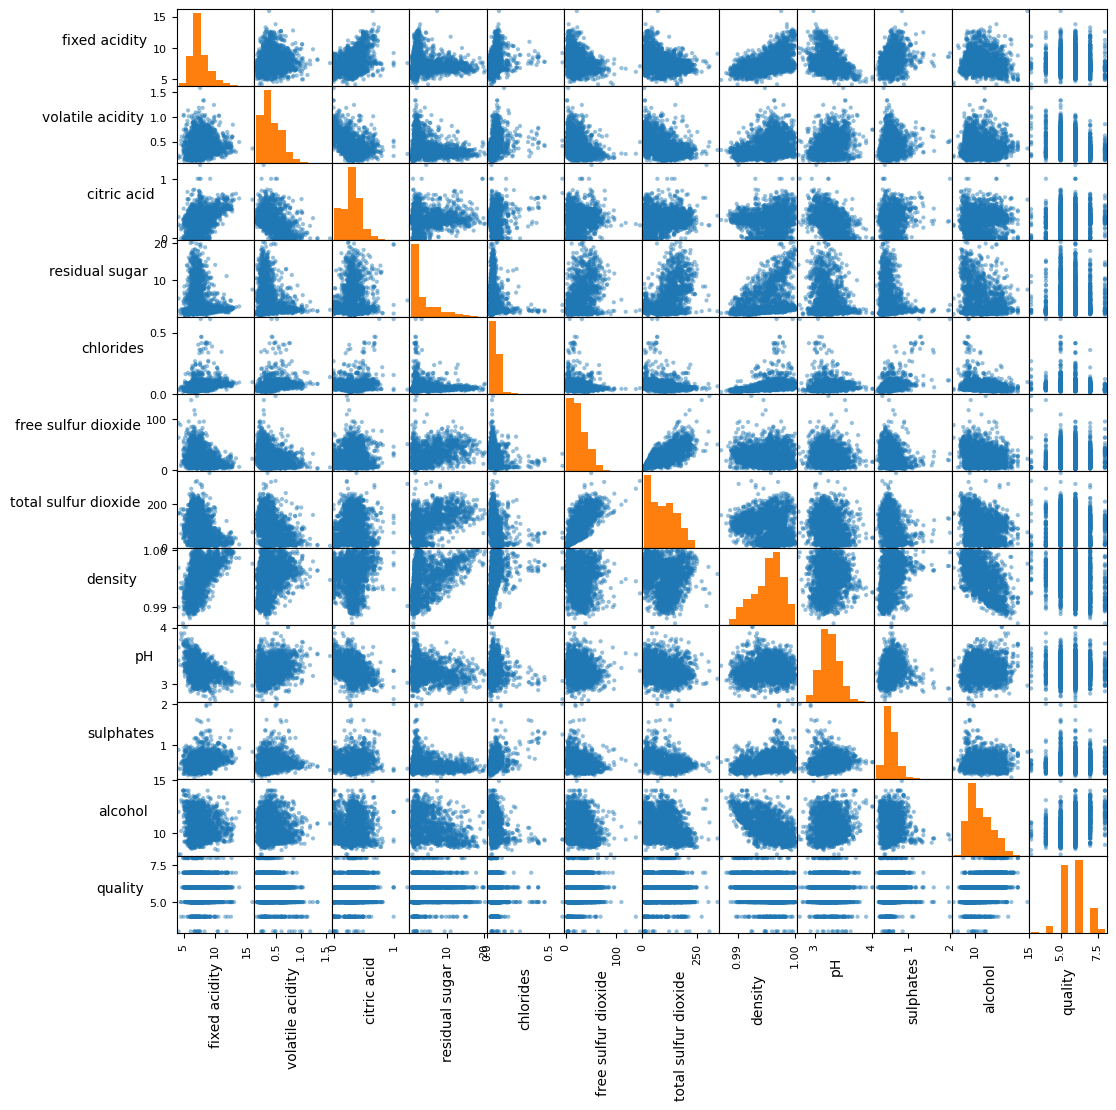

In [16]:
# Seleccionar las columnas numéricas
numeric_cols = df_filtrado.select_dtypes(include=['number'])

# Crear el scatter matrix
axs = pd.plotting.scatter_matrix(numeric_cols, figsize=(12, 12), alpha=0.47, hist_kwds={'color':'#ff7f0e'})
# la mostramos por pantalla
# acomodamos la orientación del contenido de los ejes
for i in range(len(numeric_cols.columns)):
  for j in range(len(numeric_cols.columns)):
    ax=axs[i,j]
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
plt.show()

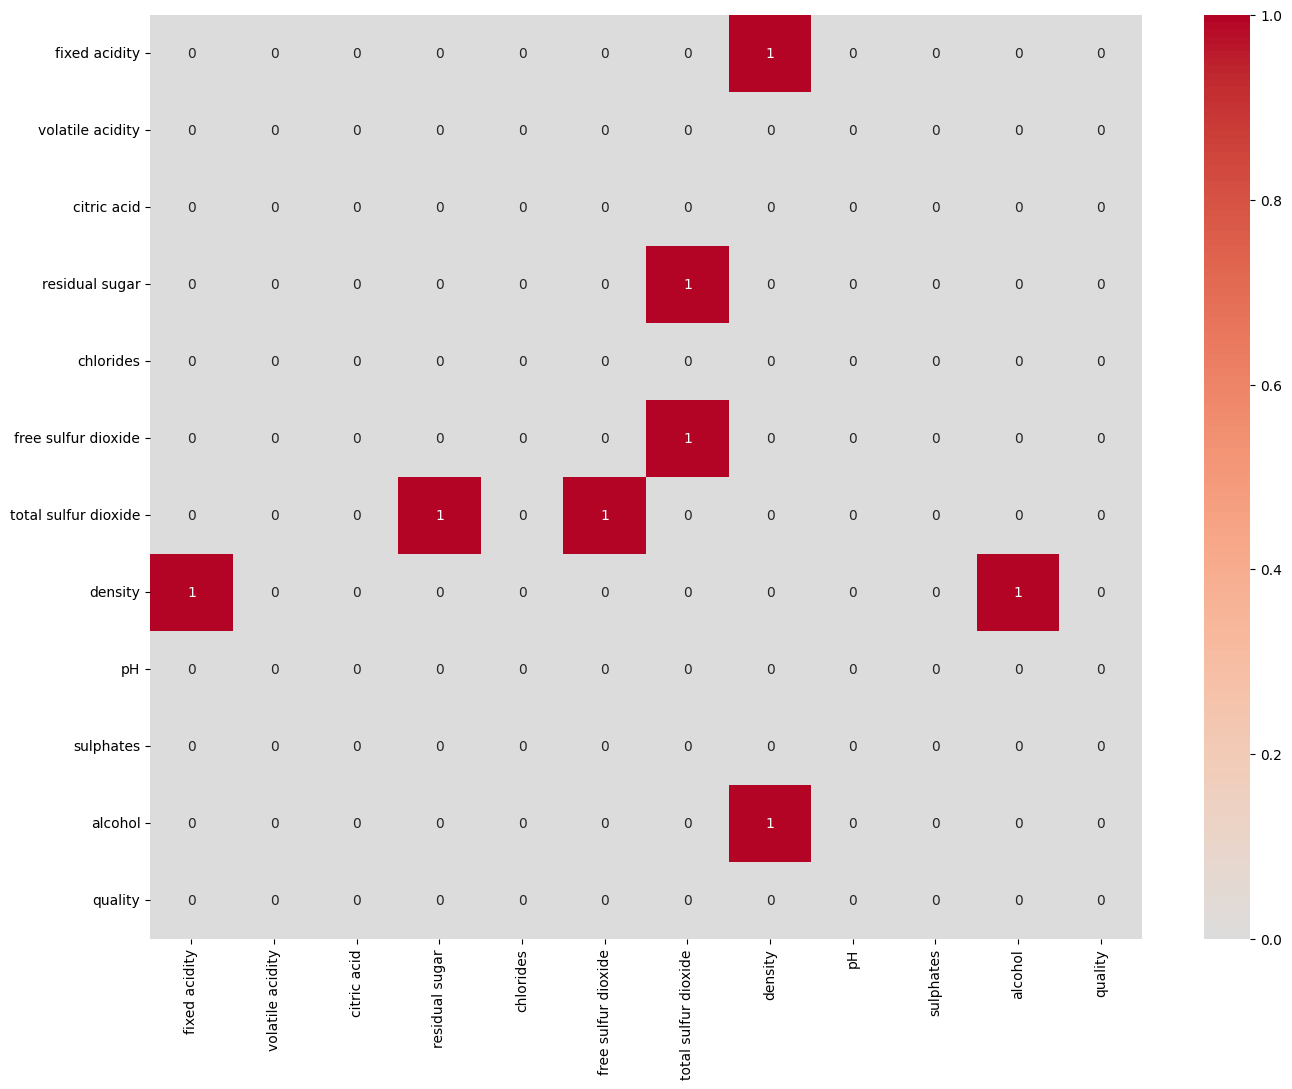

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df_sin_strings = df_filtrado.copy()
df_sin_strings = df_sin_strings.drop(columns=['type'])
correlation_matrix = df_sin_strings.corr()

# tomamos el valor absoluto de las correlaciones, umbralamos las mayores a 0.5
correlation_matrix_umbralizada = correlation_matrix.abs() > 0.5
# aprovechamos y sacamos la diagonal
np.fill_diagonal(correlation_matrix_umbralizada.values, 0)

# e imprimimos la matriz como un heatmap
plt.figure(figsize=(16,12));
sns.heatmap(correlation_matrix_umbralizada, vmin=0.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')
plt.show()

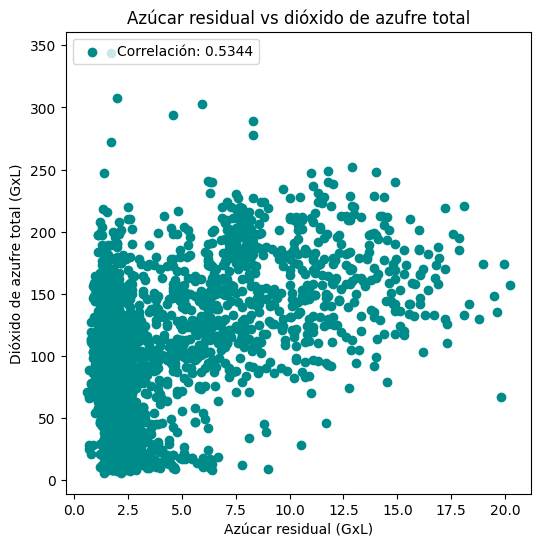

In [18]:
# Crear el gráfico de dispersión
plt.figure(figsize=(6, 6))  # Hacer el gráfico cuadrado

datos_columna1 = df_filtrado["residual sugar"]
datos_columna2 = df_filtrado["total sulfur dioxide"]
coeficiente_correlacion = np.corrcoef(datos_columna1, datos_columna2)[0, 1]

plt.scatter(datos_columna1, datos_columna2, c="#008b8b")

# Añadir etiquetas y título
plt.xlabel("Azúcar residual (GxL)")
plt.ylabel("Dióxido de azufre total (GxL)")
plt.title("Azúcar residual vs dióxido de azufre total")
plt.legend([f"Correlación: {coeficiente_correlacion:.4f}"], loc="upper left")

# Mostrar el gráfico
plt.show()



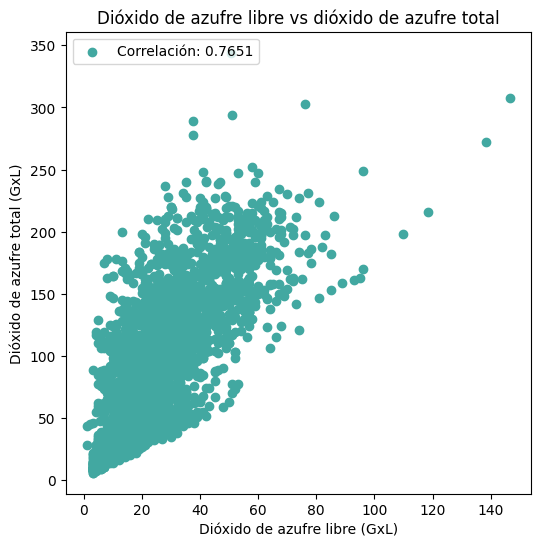

In [19]:
# Crear el gráfico de dispersión
plt.figure(figsize=(6, 6))  # Hacer el gráfico cuadrado

datos_columna1 = df_filtrado["free sulfur dioxide"]
datos_columna2 = df_filtrado["total sulfur dioxide"]
coeficiente_correlacion = np.corrcoef(datos_columna1, datos_columna2)[0, 1]

# Añadir otra variable en color verde
plt.scatter(datos_columna1, datos_columna2, c="#42A8A1")

# Añadir etiquetas y título
plt.xlabel("Dióxido de azufre libre (GxL)")
plt.ylabel("Dióxido de azufre total (GxL)")
plt.title("Dióxido de azufre libre vs dióxido de azufre total")
plt.legend([f"Correlación: {coeficiente_correlacion:.4f}"], loc="upper left")

# Mostrar el gráfico
plt.show()



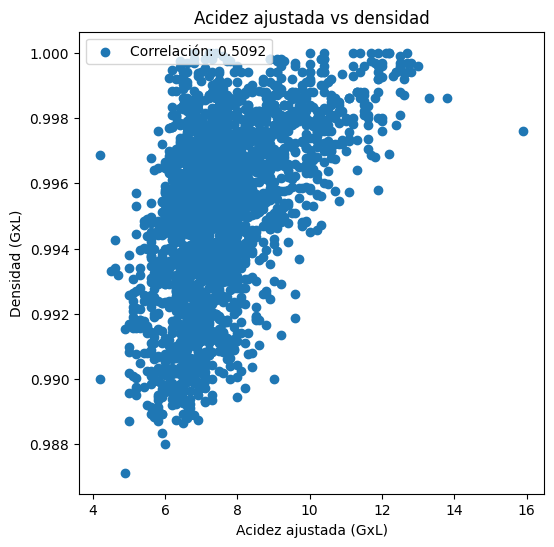

In [20]:
# Crear el gráfico de dispersión
plt.figure(figsize=(6, 6))  # Hacer el gráfico cuadrado

datos_columna1 = df_filtrado["fixed acidity"]
datos_columna2 = df_filtrado["density"]
coeficiente_correlacion = np.corrcoef(datos_columna1, datos_columna2)[0, 1]

# Añadir otra variable en color verde
plt.scatter(datos_columna1, datos_columna2)

# Añadir etiquetas y título
plt.xlabel("Acidez ajustada (GxL)")
plt.ylabel("Densidad (GxL)")
plt.title("Acidez ajustada vs densidad")
plt.legend([f"Correlación: {coeficiente_correlacion:.4f}"], loc="upper left")

# Mostrar el gráfico
plt.show()



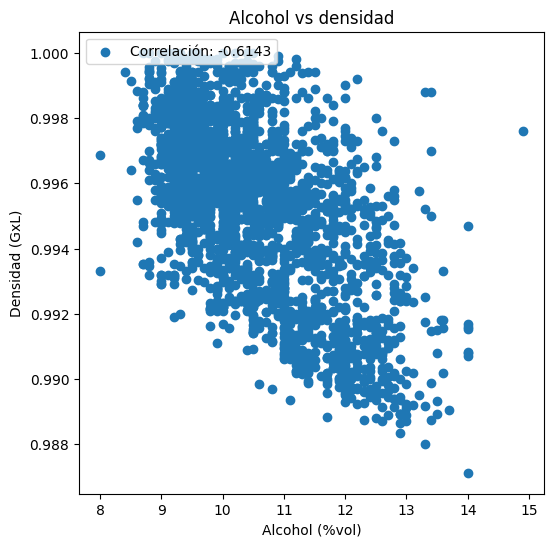

In [21]:
# Crear el gráfico de dispersión
plt.figure(figsize=(6, 6))  # Hacer el gráfico cuadrado

datos_columna1 = df_filtrado["alcohol"]
datos_columna2 = df_filtrado["density"]
coeficiente_correlacion = np.corrcoef(datos_columna1, datos_columna2)[0, 1]

# Añadir otra variable en color verde
plt.scatter(datos_columna1, datos_columna2)

# Añadir etiquetas y título
plt.xlabel("Alcohol (%vol)")
plt.ylabel("Densidad (GxL)")
plt.title("Alcohol vs densidad")
plt.legend([f"Correlación: {coeficiente_correlacion:.4f}"], loc="upper left")

# Mostrar el gráfico
plt.show()



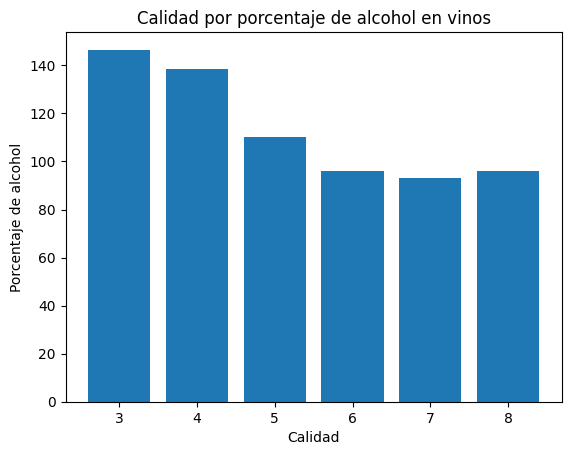

In [22]:
plt.bar(df_filtrado["quality"], df_filtrado["free sulfur dioxide"])

# Agregar etiquetas a los ejes
plt.xlabel("Calidad")
plt.ylabel("Porcentaje de alcohol")

# Agregar un título al gráfico
plt.title("Calidad por porcentaje de alcohol en vinos")
#plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor visualización
0
# Mostrar el gráfico
plt.show()

In [23]:
condicion = dataset_modificado['quality'] == 8 # LOS VALORES CON LOS QUE TE QUERES QUEDAR  
df_max_calidad = dataset_modificado[condicion]
df_max_calidad

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
32,Viogner,6.5,0.130,0.37,1.00,0.036,0.048,0.1140,991.10,3.41,0.51,11.5,8
82,Viogner,6.5,0.180,0.34,1.60,0.040,0.043,0.1480,991.20,3.32,0.59,11.5,8
145,Viogner,6.4,0.150,0.36,1.80,0.034,0.043,0.1500,992.20,3.42,0.69,11.0,8
164,Viogner,6.9,0.250,0.27,9.05,0.039,0.037,0.1280,993.60,3.27,0.34,11.3,8
347,Viogner,7.6,0.200,0.30,14.20,0.056,0.053,0.2125,999.00,3.14,0.46,8.9,8
665,Viogner,6.3,0.410,0.18,3.50,0.027,0.023,0.1090,990.18,3.34,0.54,12.8,8
700,Viogner,6.8,0.370,0.28,1.90,0.024,0.064,0.1060,989.93,3.45,0.60,12.6,8
709,Viogner,7.7,0.400,0.27,4.50,0.034,0.027,0.0950,991.75,3.21,0.59,12.3,8
749,Viogner,6.9,0.150,0.28,4.40,0.029,0.014,0.1070,993.47,3.24,0.46,10.4,8
756,Viogner,6.8,0.460,0.26,2.70,0.042,0.028,0.0830,991.14,3.38,0.51,12.0,8


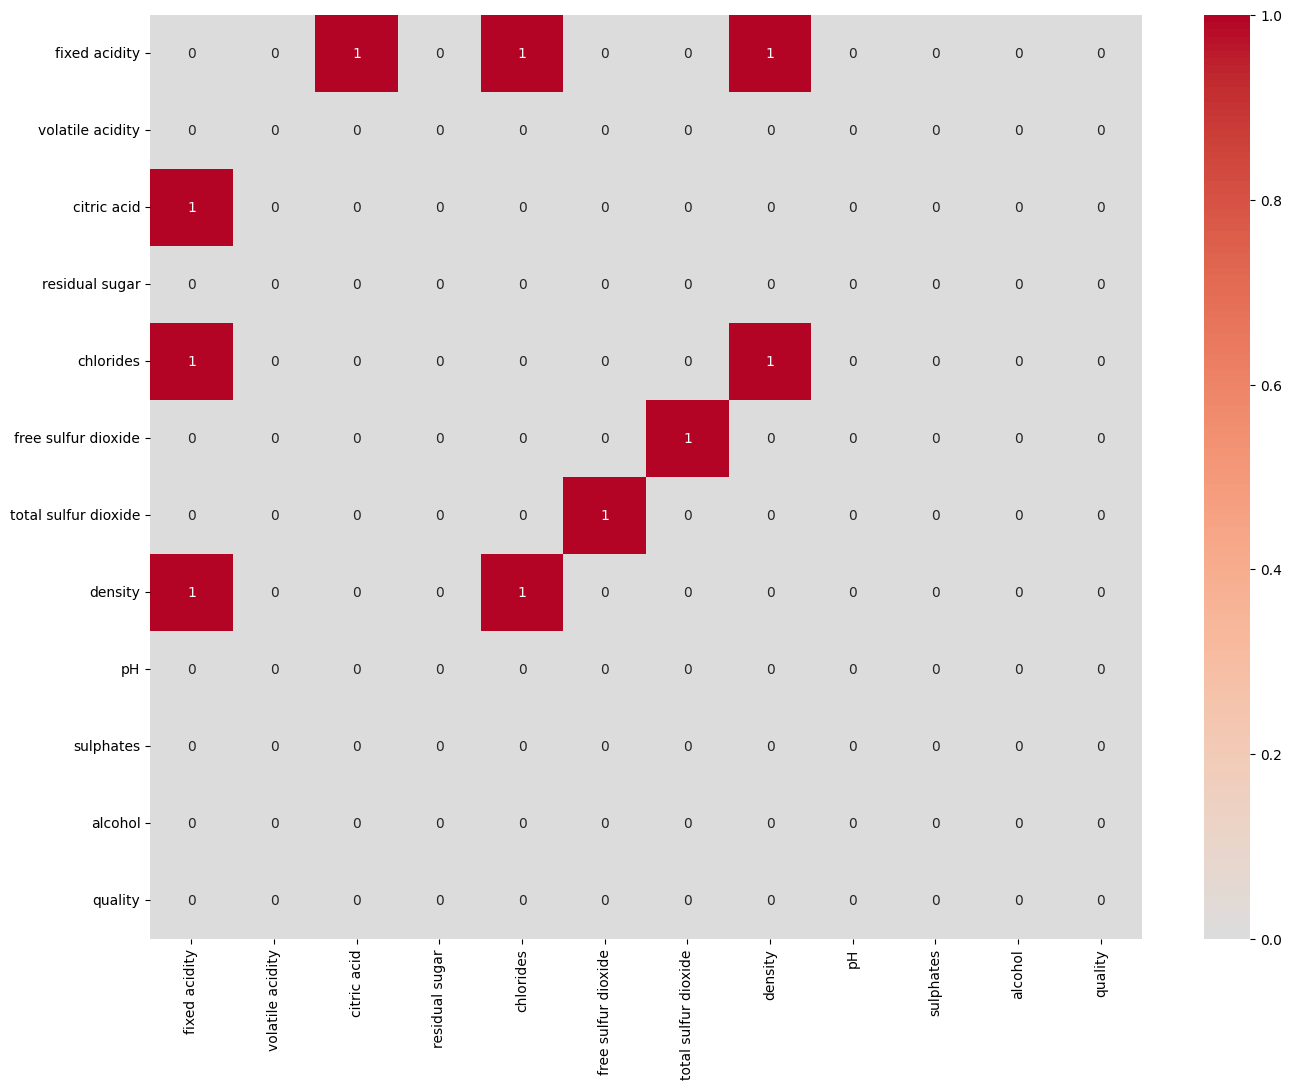

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df_sin_strings = df_max_calidad.copy()
df_sin_strings = df_sin_strings.drop(columns=['type'])
correlation_matrix = df_sin_strings.corr()

# tomamos el valor absoluto de las correlaciones, umbralamos las mayores a 0.5
correlation_matrix_umbralizada = correlation_matrix.abs() > 0.6
# aprovechamos y sacamos la diagonal
np.fill_diagonal(correlation_matrix_umbralizada.values, 0)

# e imprimimos la matriz como un heatmap
plt.figure(figsize=(16,12));
sns.heatmap(correlation_matrix_umbralizada, vmin=0.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')
plt.show()

In [25]:
nombre_archivo = "vinos_max_calidad"

# Generamos el reporte
report = pp.ProfileReport(df_max_calidad)

# Lo mostramos interactivo en nuestra notebook
if not Path(f"{nombre_archivo}.html").exists():
    report.to_file(output_file=(f"{nombre_archivo}.html"))
else:
    print("ya está creado, relaja que ahí te lo abro")

# Abrir el archivo HTML
webbrowser.open(f'{nombre_archivo}.html')



c:\Users\Tomas\Desktop\Tomi Ilari\Facu\Fund\practico2\.venv\Lib\site-packages\ydata_profiling\utils\dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

True

In [21]:
df_filtrado

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,Viogner,7.4,0.190,0.49,6.7,0.037,15.0,110.0,0.99380,3.20,0.38,11.0,7
2,Viogner,7.5,0.140,0.74,1.6,0.035,21.0,126.0,0.99330,3.26,0.45,10.2,6
3,Viogner,7.8,0.490,0.49,7.0,0.043,29.0,149.0,0.99520,3.21,0.33,10.0,5
4,Viogner,8.1,0.120,0.49,1.2,0.042,43.0,160.0,0.99340,3.13,0.48,9.7,6
5,Viogner,7.6,0.470,0.49,13.0,0.239,42.0,220.0,0.99880,2.96,0.51,9.2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3226,Merlot,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
3227,Merlot,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
3228,Merlot,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
3230,Merlot,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


C:\Users\Tomas\AppData\Local\Temp\ipykernel_1984\2181534400.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_filtrado[df_filtrado["type"] == "Viogner"]["fixed acidity"],


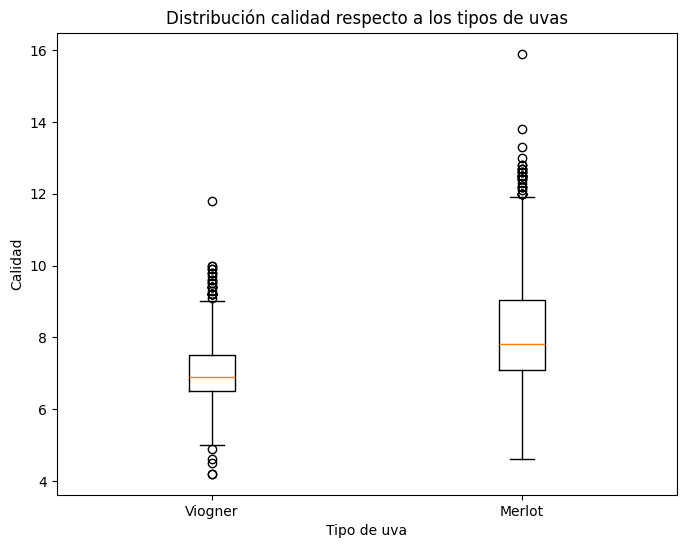

In [29]:
# Crear el boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([df_filtrado[df_filtrado["type"] == "Viogner"]["fixed acidity"],
             df_filtrado[df_filtrado["type"] == "Merlot"]["fixed acidity"]],
             labels=["Viogner", "Merlot"])
# Agregar etiquetas a los ejes
plt.xlabel("Tipo de uva")
plt.ylabel("Acidez ajustada")

# Agregar un título al gráfico
plt.title("Distribución calidad respecto a los tipos de uvas")

# Mostrar el gráfico
plt.show()